### Package 内の Class のシミュレーションを実行する
[Modelicaのクラスの概要](https://www.amane.to/wp-content/uploads/2018/12/8ec4f21241c98ee8413280240090c942.pdf) の ClassExample1.mo の中のクラス MassA　のシミュレーションを実行します。

このモデルは、質点の放物運動を表すモデルで、運動方程式
$$
v=\frac{dx}{dt}, \ f=m \frac{dv}{dt} 
$$
を解きます。パラメータを、
$$
m = 1.0, \  f=mg, \ g=-9.8
$$
とし、初期条件を
$$
x_0 = 0.0, v_0 = 5.0 
$$
とします。

Modelica のコードをMagicコマンド %%writefile で出力します。

In [1]:
%%writefile ClassExample1.mo
package ClassExample1 // package
  constant Acceleration g = -9.8;

  // type
  type Mass = Real(quantity = "Mass", unit = "kg");
  type Force = Real(quantity = "Force", unit = "N");
  type Velocity = Real(quantity = "Velocity", unit = "m/s");
  type Position = Real(quantity = "Length", unit = "m");
  type Acceleration = Real(quantity = "Acceleration", unit = "m/s2");
  
  // class
  class MassA
    parameter Mass m = 1.0;
    parameter Force f = m*g;
    parameter Velocity v0 = 5.0;
    parameter Position x0 = 0.0;
    Position x(start = x0);
    Velocity v(start = v0);
  equation
      v = der(x);
      f = m*der(v);
  end MassA;

end ClassExample1;

クラス MassA をコンパイルして FMU を作成します。compile_fmu の引数はクラス名とファイル名です。クラス名はパッケージ名から辿ったフルネームです。

In [2]:
# Import the function for compilation of models and the load_fmu method
from pymodelica import compile_fmu
from pyfmi import load_fmu
# Compile model
fmu_name = compile_fmu("ClassExample1.MassA","ClassExample1.mo")
# Load model
model = load_fmu(fmu_name)

シミュレーションを実行します。オプション ncp は Number of communication points で、ソルバーとFMUが通信する回数を表しています。これを 0 にするとソルバー内部の時間ステップになります。オプションの詳細は [JModelica User Guide - Version 2.10](https://jmodelica.org/downloads/UsersGuide-2.10.pdf) P.26-2９ を参照してください。

In [3]:
opts = model.simulate_options()
opts['ncp']=500
res = model.simulate(final_time=1.,options=opts)

Final Run Statistics: --- 

 Number of steps                                 : 15
 Number of function evaluations                  : 19
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 2
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 15
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 0.0001

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 0.0149250030518 seconds.


シミュレーション結果をプロットします。

<IPython.core.display.Javascript object>


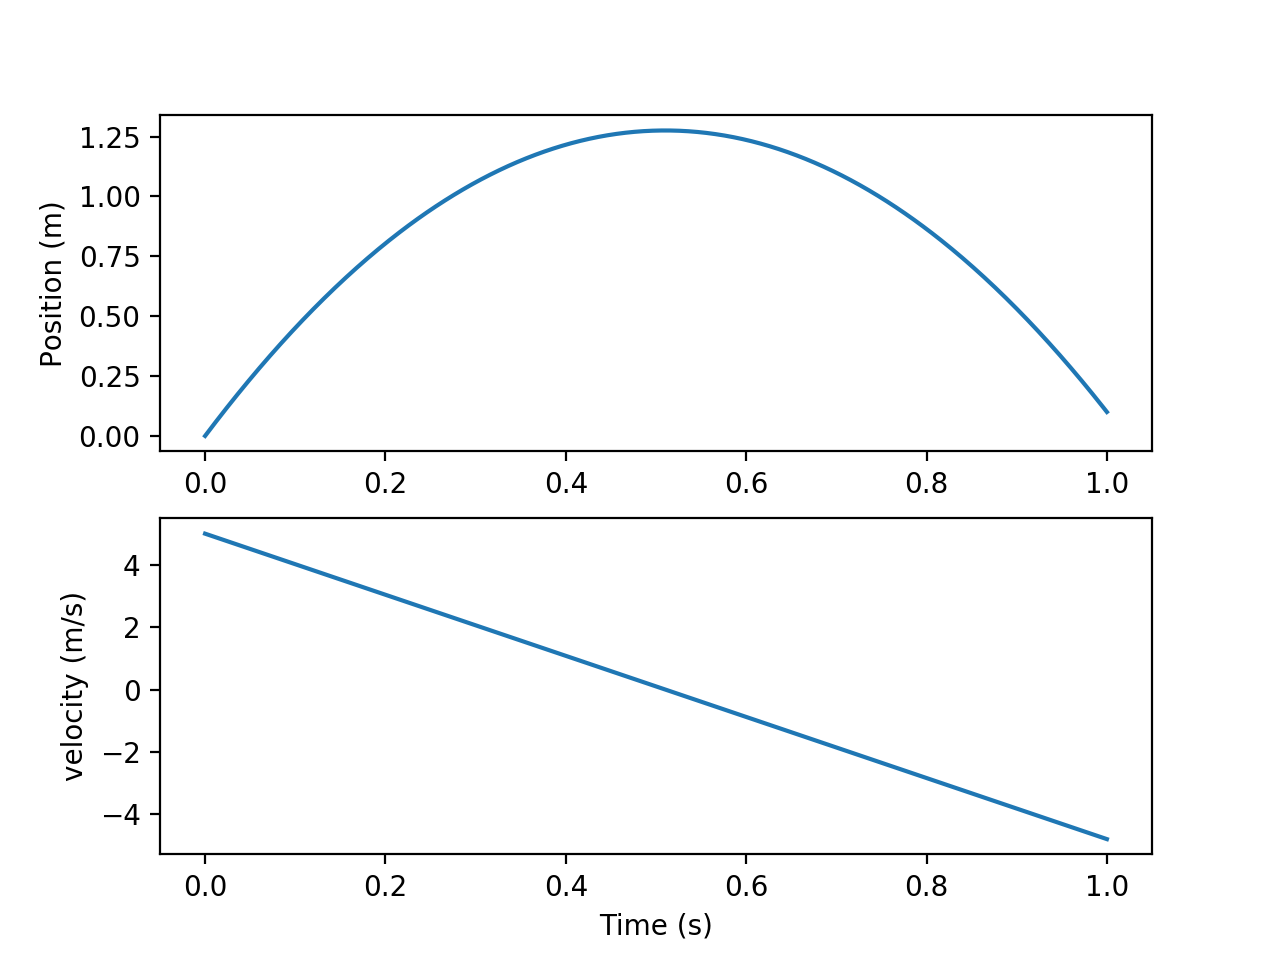

In [4]:
%matplotlib notebook
# Import the plotting library
import matplotlib.pyplot as plt 
x = res['x']
v = res['v']
t = res['time']

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t, x)
plt.ylabel('Position (m)')
plt.subplot(2,1,2)
plt.plot(t,v)
plt.ylabel('velocity (m/s)')
plt.xlabel('Time (s)')
plt.show()